In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

In [2]:
#conv layers
model = Sequential()
#model.add(Conv2D(64, (3, 3), input_shape=(250,250,3)))
model.add(Conv2D(94,(3,3),input_shape = (250,250,3), activation = 'relu'))
 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(72,(3,3), activation = 'relu'))

 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(68,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [3]:
#fully connected layers
model.add(Flatten())  
 
model.add(Dense( activation = 'relu', units=64))

model.add(Dense( activation = 'sigmoid', units=1)) 
 


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 94)      2632      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 94)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 72)      60984     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 72)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 68)        44132     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 68)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 64)        39232     
__________

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:

train_datagen = ImageDataGenerator(
        rescale=1./255,
       )

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_set = train_datagen.flow_from_directory(
        'D:/manipal/Term3/AI/DAY_5/helmet_detection/training',
        target_size=(250, 250),
        class_mode='binary')

Found 647 images belonging to 2 classes.


In [8]:
test_set = test_datagen.flow_from_directory(
        'D:/manipal/Term3/AI/DAY_5/helmet_detection/testing',
        target_size=(250, 250),
        class_mode='binary')

Found 208 images belonging to 2 classes.


In [9]:
model.fit_generator(
        train_set,
        epochs=15,
        validation_data=test_set)


Epoch 1/15
21/21 [==============================] - 270s 13s/step - loss: 0.7031 - acc: 0.5361 - val_loss: 0.6853 - val_acc: 0.4808
Epoch 2/15
21/21 [==============================] - 246s 12s/step - loss: 0.6843 - acc: 0.5862 - val_loss: 0.6489 - val_acc: 0.8606
Epoch 3/15
21/21 [==============================] - 244s 12s/step - loss: 0.5652 - acc: 0.7946 - val_loss: 0.3335 - val_acc: 0.8750
Epoch 4/15
21/21 [==============================] - 244s 12s/step - loss: 0.4231 - acc: 0.7973 - val_loss: 0.5052 - val_acc: 0.7596
Epoch 5/15
21/21 [==============================] - 242s 12s/step - loss: 0.3657 - acc: 0.8459 - val_loss: 0.2906 - val_acc: 0.8702
Epoch 6/15
21/21 [==============================] - 244s 12s/step - loss: 0.3290 - acc: 0.8563 - val_loss: 0.2947 - val_acc: 0.8510
Epoch 7/15
21/21 [==============================] - 243s 12s/step - loss: 0.2962 - acc: 0.8787 - val_loss: 0.2941 - val_acc: 0.8510
Epoch 8/15
21/21 [==============================] - 241s 11s/step - loss: 0.

In [10]:
train_set.class_indices

{'with helmet': 0, 'without helmet': 1}

In [11]:
label_map = (train_set.class_indices)
print(label_map)

{'with helmet': 0, 'without helmet': 1}


In [40]:
## prediction of single new data
import numpy as np
from tensorflow.keras.preprocessing import image
test_image= image.load_img('D:/manipal/Term3/AI/DAY_5/helmet_detection/single_prediction/abc.jpg'
                           ,target_size =(250,250))


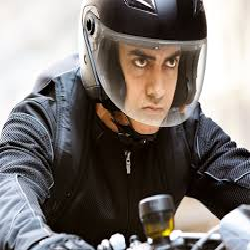

In [41]:
test_image

In [42]:
## Convert image to array
test_image = image.img_to_array(test_image)
test_image.shape

(250, 250, 3)

In [43]:
test_image=test_image.reshape(1,250, 250, 3)

In [44]:
## For single prediction change the dimension using axis. To remove problem of batch
#test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)
result

array([[0.]], dtype=float32)

In [45]:
## Class label of dog and cat

if result == 0:
    prediction = 'with helmet'
else:
    prediction = 'without helmet'
    
prediction

'with helmet'